In [4]:
print("OK")

OK


In [5]:
!nvidia-smi

Fri Feb 23 02:03:02 2024       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 529.19       Driver Version: 529.19       CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Quadro M1000M      WDDM  | 00000000:01:00.0 Off |                  N/A |
| N/A    0C    P8    N/A /  N/A |      0MiB /  4096MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [6]:
import pandas as pd

In [7]:
import os
os.getcwd()
os.chdir("..")

In [8]:
imbalanced_data = pd.read_csv(r"data\imbalanced_data.csv")

In [9]:
imbalanced_data.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


# EDA

In [10]:
import seaborn as sns

<Axes: xlabel='label', ylabel='count'>

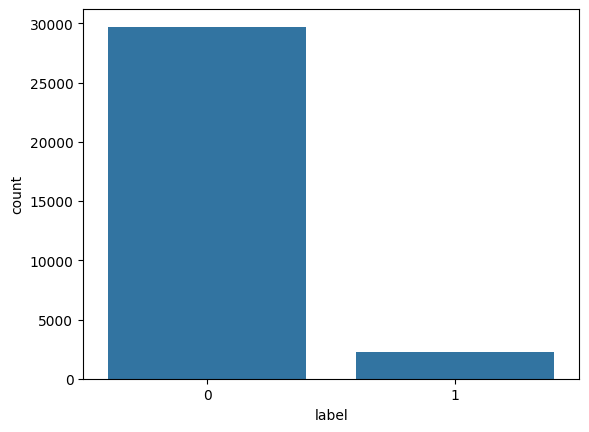

In [11]:
sns.countplot(x="label", data=imbalanced_data)

- 0 represents **No Hate sppech**
- 1 represents **hate sppech**

In [12]:
imbalanced_data.shape

(31962, 3)

In [13]:
imbalanced_data.isnull().sum()

id       0
label    0
tweet    0
dtype: int64

In [14]:
imbalanced_data.drop("id",axis=1, inplace=True)

In [15]:
imbalanced_data.head()

,label,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation


In [16]:
raw_data = pd.read_csv(r"data\raw_data.csv")

In [17]:
raw_data.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [18]:
raw_data.shape

(24783, 7)

In [19]:
raw_data.isnull().sum()

Unnamed: 0            0
count                 0
hate_speech           0
offensive_language    0
neither               0
class                 0
tweet                 0
dtype: int64

In [20]:
raw_data.drop(["Unnamed: 0","count","hate_speech","offensive_language","neither" ],axis=1, inplace=True)

In [21]:
raw_data.head()

,class,tweet
0,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [22]:
raw_data['class'].unique()

array([2, 1, 0], dtype=int64)

<Axes: xlabel='class', ylabel='count'>

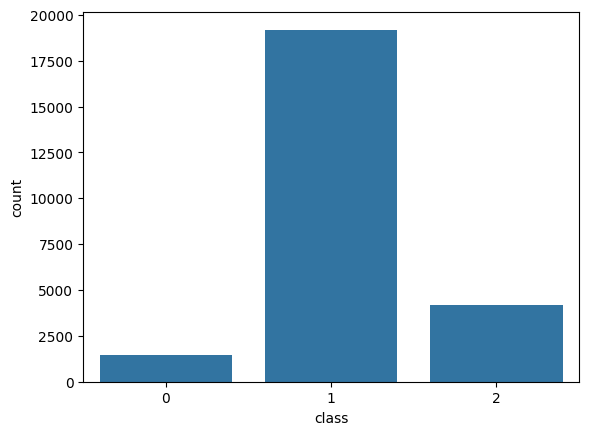

In [23]:
sns.countplot(x="class",data=raw_data)

- class 0 -> Hate
- class 1 -> Abusive
- class 2 -> no Hate

We can merge the two classes i.e., Class 0 and class 1 and name it as Hate

In [24]:
raw_data[raw_data['class']==0]['class'] = 1

C:\Users\Admin\AppData\Local\Temp\ipykernel_24516\1424958617.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw_data[raw_data['class']==0]['class'] = 1


In [25]:
raw_data['class'].unique()

array([2, 1, 0], dtype=int64)

In [26]:
raw_data[raw_data['class']==0]

,class,tweet
85,0,"""@Blackman38Tide: @WhaleLookyHere @HowdyDowdy1..."
89,0,"""@CB_Baby24: @white_thunduh alsarabsss"" hes a ..."
110,0,"""@DevilGrimz: @VigxRArts you're fucking gay, b..."
184,0,"""@MarkRoundtreeJr: LMFAOOOO I HATE BLACK PEOPL..."
202,0,"""@NoChillPaz: ""At least I'm not a nigger"" http..."
...,...,...
24576,0,this guy is the biggest faggot omfg
24685,0,which one of these names is more offensive kik...
24751,0,you a pussy ass nigga and I know it nigga.
24776,0,you're all niggers


In [27]:
raw_data['class'].replace({0:1},inplace=True)

In [28]:
raw_data.shape

(24783, 2)

In [29]:
raw_data['class'].unique()

array([2, 1], dtype=int64)

<Axes: xlabel='class', ylabel='count'>

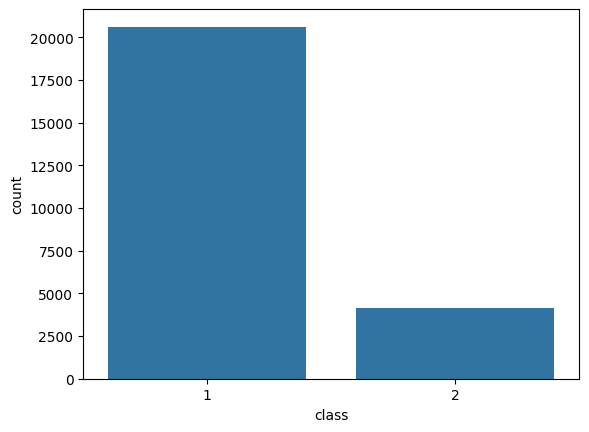

In [30]:
sns.countplot(x="class",data=raw_data)

In [31]:
raw_data['class'].replace({2:0}, inplace=True)

In [32]:
raw_data['class'].unique()

array([0, 1], dtype=int64)

In [33]:
raw_data.head()

,class,tweet
0,0,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [34]:
raw_data.rename(columns={"class":"label"},inplace=True)

In [35]:
raw_data.head()

,label,tweet
0,0,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [36]:
df = pd.concat([imbalanced_data,raw_data])

<Axes: xlabel='label', ylabel='count'>

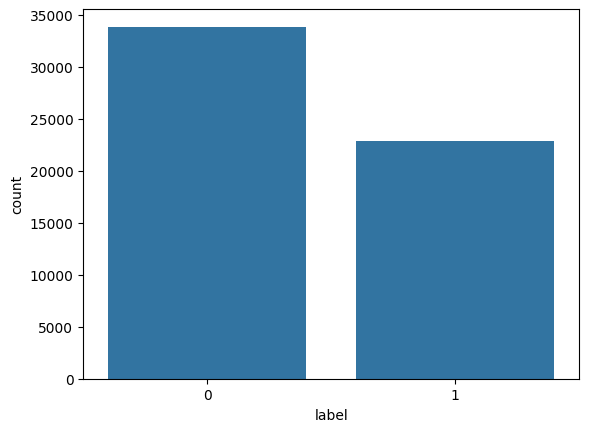

In [37]:
sns.countplot(x="label",data=df)

# Preprocessing

In [38]:
import nltk
import re
import string
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [39]:
stemmer = nltk.SnowballStemmer('english')
stopword = set(stopwords.words("english"))

In [40]:
stopword

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [41]:
# Let's apply regex and do cleaning.
def data_cleaning(words):
    words = str(words).lower()
    words = re.sub('', '', words)
    words = re.sub('https?://\S+|www\.\S+', '', words)
    words = re.sub('<.*?>+', '', words)
    words = re.sub('[%s]' % re.escape(string.punctuation), '', words)
    words = re.sub('\n', '', words)
    words = re.sub('\w*\d\w*', '', words)
    words = [word for word in words.split(' ') if words not in stopword]
    words=" ".join(words)
    words = [stemmer.stem(words) for word in words.split(' ')]
    words=" ".join(words)

    return words
     

In [42]:
df['tweet'] = df['tweet'].apply(data_cleaning)

In [43]:
x = df['tweet']
y = df['label']

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=7)

In [46]:
(len(x_train), len(y_train))

(42558, 42558)

In [47]:
(len(x_test), len(y_test))

(14187, 14187)

# Feature Engineering

In [48]:
from keras.utils import pad_sequences
from keras.preprocessing.text import Tokenizer

In [49]:
max_words = 50000
max_len = 300

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(x_train)

sequences = tokenizer.texts_to_sequences(x_train)
sequences_matrix = pad_sequences(sequences=sequences, maxlen=max_len)

In [50]:
sequences_matrix

array([[8856, 2703, 2607, ..., 7232,  166, 3271],
       [   0,    0,    0, ...,   66,   64,    5],
       [   0,    0,    0, ...,   95,  132, 5932],
       ...,
       [   0,    0,    0, ...,  204,   13,   98],
       [   0,    0,    0, ...,  466,  143,  409],
       [3950, 3907, 3775, ...,  230,    6, 6108]])

In [51]:
from keras.models import Sequential
from keras.optimizers import RMSprop
from keras.layers import LSTM, SpatialDropout1D, Dropout, Embedding, Dense, Activation, Input

In [52]:
model = Sequential()
model.add(Embedding(max_words, 100, input_length=max_len))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2,recurrent_dropout=0.2))
model.add(Dense(1,activation="sigmoid"))        ## sigmoid is used because problem is binary classification
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 300, 100)          5000000   
                                                                 
 spatial_dropout1d (SpatialD  (None, 300, 100)         0         
 ropout1D)                                                       
                                                                 
 lstm (LSTM)                 (None, 100)               80400     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 5,080,501
Trainable params: 5,080,501
Non-trainable params: 0
_________________________________________________________________


In [53]:
model.compile(loss="binary_crossentropy", optimizer = RMSprop(), metrics=['accuracy'])

In [54]:
history = model.fit(sequences_matrix, y_train,batch_size=128,epochs=1,validation_split=0.2)

266/266 [==============================] - 1195s 4s/step - loss: 0.2648 - accuracy: 0.9041 - val_loss: 0.1850 - val_accuracy: 0.9328


In [63]:
 
test_sequences = tokenizer.texts_to_sequences(x_test)
test_sequences_matrix = pad_sequences(test_sequences,maxlen=max_len)

In [64]:
test_sequences_matrix

array([[    0,     0,     0, ...,   837,   143, 39567],
       [    0,     0,     0, ...,   314,    68,    63],
       [    0,     0,     0, ...,   430,   266,    28],
       ...,
       [  577,    42,   439, ...,  6548,  1965,  3538],
       [    0,     0,     0, ...,    82,    18,    98],
       [    0,     0,     0, ...,  1420,   239,  1465]])

In [65]:
accr = model.evaluate(test_sequences_matrix, y_test)

444/444 [==============================] - 56s 126ms/step - loss: 0.1685 - accuracy: 0.9371


In [66]:
lstm_prediction = model.predict(test_sequences_matrix)

444/444 [==============================] - 57s 127ms/step


In [67]:
res = []
for prediction in lstm_prediction:
    if prediction[0] < 0.5:
        res.append(0)
    else:
        res.append(1)
        

In [68]:
from sklearn.metrics import confusion_matrix

In [69]:
print(confusion_matrix(y_test,res))

[[8315  249]
 [ 644 4979]]


In [71]:
import pickle
with open("data/tokenizer.pickle",'wb') as handle:
    pickle.dump(tokenizer,handle,protocol=pickle.HIGHEST_PROTOCOL)

In [72]:
model.save("data/model.h5")